# Analisando Dados dos Relacionamentos no GitHub

### Gabriel Pereira de Oliveira - Bacharelado em Ciência da Computação - DCC/UFMG

Com a expansão da Internet e o acesso a serviços de banda larga, pessoas comuns têm à disposição uma gama de aplicativos e serviços online. Assim, **grandes volumes de dados são gerados diariamente**, podendo ser processados com os mais variados propósitos. Entre tantas opções, sem dúvidas um dos serviços mais populares é o de **redes sociais online**, que reunem milhões de pessoas com objetivos semelhantes ao redor do mundo. 

Tais redes não são apenas para diversão e conexões pessoais, mas também para **trabalho e conexões profissionais**. Por exemplo, o **[GitHub](http://github.com)** é uma das maiores plataformas online de desenvolvimento colaborativo de software do mundo, reunindo uma comunidade de mais de **28 milhões de desenvolvedores** reunidos em mais de **85 milhões de projetos em 337 linguagens de programação** (Junho de 2018). Dessa forma, devido ao grande volume de dados, técnicas de ciência de dados são muito importantes para trazer à tona informações e análises relevantes sobre a colaboração de software no GitHub, que inicialmente não poderiam ser percebidas olhando apenas para os dados puros.

![GitHub Logo](images/github_logo.png)

Neste trabalho, será explorada a criação da rede de colaboração entre usuários no GitHub, através de diversas técnicas de ciência dos dados.

## Base de Dados

A base de dados...

## Rede Social de Colaboração

A rede será assim e assado...

## Análise da Rede Social
Nesta seção, analisaremos...

### Primeiros números
Número de nós, arestas, densidade

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import powerlaw

Neste projeto, vamos efetuar uma análise das redes de colaboração de **sete** linguagens de programação no GitHub. Tais linguagens foram escolhidas por serem de alta popularidade segundo o [TIOBE Index](https://www.tiobe.com/tiobe-index/) de março de 2016 e classificadas segundo seu nível de colaboração [(Rocha et al. 2016)](https://homepages.dcc.ufmg.br/~mirella/pdf/2016.SBBDshort.Rocha.pdf). As linguagens escolhidas são as seguintes:

* **Linguagens mais colaborativas** 
 * JavaScript (JS)
 * Python (PY)
 * Ruby (RB)
 
* **Linguagens menos colaborativas** 
 * Assembly (AS)
 * Pascal (PA)
 * Perl (PL)
 * Visual Basic (VB)

Para cada uma das linguagens, foi gerado o respectivo grafo de colaboração, que pode ser baixado [aqui](https://drive.google.com/drive/folders/1lcb2yFkLG80-uLQIAcEt26rVPgqGvjVy?usp=sharing). Aqui, vamos trabalhar com o grafo não-ponderado, ou seja, as arestas não possuem peso. No entanto, o peso das arestas pode ser facilmente adicionado posteriormente.

In [3]:
languages = {
    "AS": "Assembly",
    "JS": "JavaScript",
    "PA": "Pascal",
    "PL": "Perl",
    "PY": "Python",
    #"RB": "Ruby",
    "VB": "Visual Basic"
}

Inicialmente, para cada linguagem de programação, vamos calcular algumas métricas básicas de redes complexas para indicar algumas propriedades das redes existentes. O pacote `networkx` do Python nos ajudará bastante no cálculo das métricas e nas análises a serem feitas. As primeiras propriedades que vamos calcular são as seguintes:

#### Número de Nós
É ó número de vértices existentes no grafo. No contexto da rede de colaboração do GitHub, representa o número de desenvolvedores que colaboram em cada linguagem.

#### Número de Arestas
É ó número de arestas não-direcionadas existentes entre os nós no grafo. Aqui, pode representar o número de pares de desenvolvedores que colaboram entre si em cada linguagem de programação.

#### Densidade
É a razão entre a quantidade de arestas do grafo e a quantidade de arestas do grafo completo (onde todos os nós têm arestas entre si) com a mesma quantidade de vértices.

#### Coeficiente de Clusterização Médio
Este coeficiente mede o grau com que os nós de um grafo tendem a agrupar-se. Para cada nó $i$ de um grafo, seu coeficiente de clusterização é dado por:

$$CC_i = \frac{2L_i}{k_i(k_1 - 1)}$$

$L_i$ representa o número de arestas entre os $k_i$ vizinhos de $i$. Um exemplo de cálculo do coeficiente de clusterização pode ser observado na figura abaixo.

<img src="images/clustering_coefficient.png" alt="CC" width="450"/>

Dessa forma, podemos calcular o CC médio para todo o grafo através da fórmula

$$CC = \frac{1}{n}\sum_{i \in G} CC_i$$

#### Tamanho do Componente Gigante

In [2]:
# Lê lista de arestas e gera o grafo
print("Generating network by reading edge list...")
G = nx.read_edgelist('data/PY_topological_network.csv', delimiter=',')

# Primeiras estatísticas
print("Nodes:", nx.number_of_nodes(G))
print("Edges:", nx.number_of_edges(G))
print("Density:", nx.density(G))

Generating network by reading edge list...
Nodes: 519771
Edges: 3699096
Density: 2.7384344130634966e-05


### Distribuição de graus

A distribuição de grau dos nós da rede...

Plotting degree distribution...


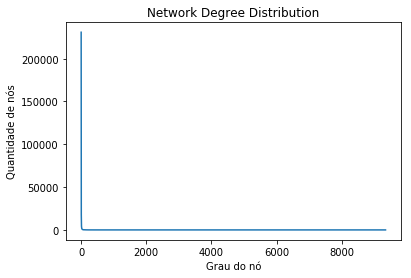

In [4]:
# Gera distribuição de graus do grafo
print("Plotting degree distribution...")
degs = {}
for n in G.nodes():
	deg = G.degree(n)
	if deg not in degs:
		degs[deg] = 0
	degs[deg] += 1

items = sorted(degs.items())
X = np.array([k for (k, v) in items])
Y = np.array([v for (k, v) in items])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X, Y)
ax.set_xlabel('Grau do nó')
ax.set_ylabel('Quantidade de nós')

# Plota gráfico normal
plt.title("Network Degree Distribution")
fig.savefig("plots/degree_distribution.png")

A distribuição de graus dessa rede pode dizer que...

Fazendo o gráfico log-log...

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


Sigma 0.04992213470947602
Alpha 1.6881291386438328


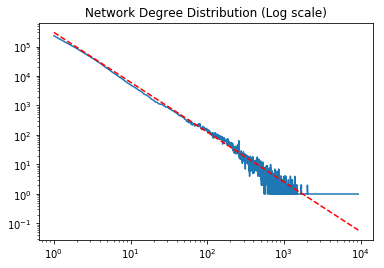

In [6]:
# Descobre coeficiente alpha da distribuição power-law -> p(k) = Ck^(-alpha)
max_degree = max(degs.keys(), key=int)
num_nodes = [] # Lista com o numero 

for i in range(1, max_degree + 1):
    num_nodes.append(degs.get(i, 0))

np.seterr(divide='ignore', invalid='ignore') # para não dar erro de divisão
fit = powerlaw.Fit(num_nodes, discrete=True)
sigma = fit.power_law.sigma
alpha = fit.power_law.alpha

fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xscale('log')
ax.set_yscale('log')

pl = lambda x: 300000*(x**(-alpha))
ax.plot(X, Y)
ax.plot(X, pl(X), 'r--')

print("Sigma", sigma)
print("Alpha", alpha)

# Plota grafico log-log
plt.title("Network Degree Distribution (Log scale)")
fig.savefig("plots/degree_distribution_loglog.png")